Import Statements

In [38]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import os
os.getcwd()

'/home/dominic/Documents/Chapman/spin/berkeley_collab/superconducting_circuit_sim/geometric_gate/Setiawan2022/notebooks'

Import Data

In [44]:
CZ_pulse = np.load('../output/pulses/CZ_130ns_1.135GHz_0.01dt.npy')
CZ_delta_wmod = np.load('../output/pulses/CZ__Pulse__delta_wmod_130ns_1.135GHz_0.01dt.npy', allow_pickle=True)
CZ_g_ac = np.load('../output/pulses/CZ__Pulse__g_ac_130ns_1.135GHz_0.01dt.npy', allow_pickle=True)
CZ_omega_A = np.load('../output/pulses/CZ__Pulse__omega_A_130ns_1.135GHz_0.01dt.npy')
CZ_omega_B = np.load('../output/pulses/CZ__Pulse__omega_B_130ns_1.135GHz_0.01dt.npy')

#separate out A and B pulses
CZ_delta_wmod_A = np.array([x['A'] for x in CZ_delta_wmod])
CZ_delta_wmod_B = np.array([x['B'] for x in CZ_delta_wmod])
CZ_g_ac_A = np.array([x['A'] for x in CZ_g_ac])
CZ_g_ac_B = np.array([x['B'] for x in CZ_g_ac])

#import trajectories
CZ_xeg = qt.qload('../output/trajectories/CZ_xeg--s0_130ns_1.135GHz_0.01dt')
CZ_egg = qt.qload('../output/trajectories/CZ_geg-s0_130ns_1.135GHz_0.01dt')
print(type(CZ_egg))

<class 'qutip.solver.Result'>


/home/dominic/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_8748/67665249.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


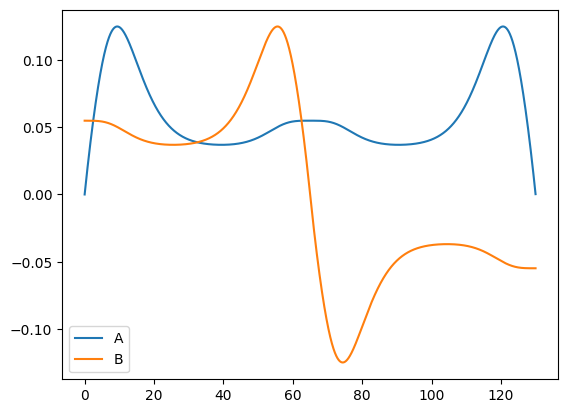

In [40]:
tg = 130
dt = 0.01
tlist = np.arange(0, 130, dt)
# plot omegas 
fig, ax = plt.subplots()
ax.plot(tlist, CZ_omega_A, label='A')
ax.plot(tlist, CZ_omega_B, label='B')
ax.legend()
fig.show()

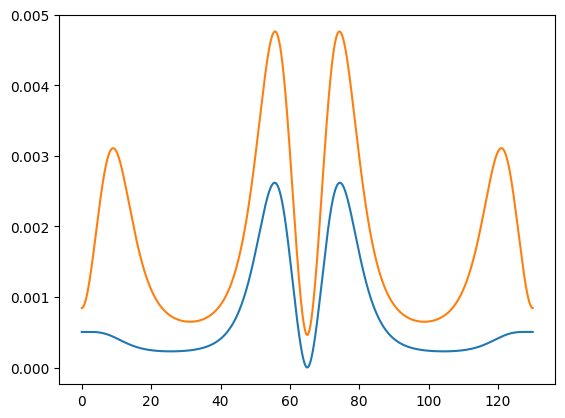

In [41]:
plt.plot(tlist, CZ_delta_wmod_A)
plt.plot(tlist, CZ_delta_wmod_B)

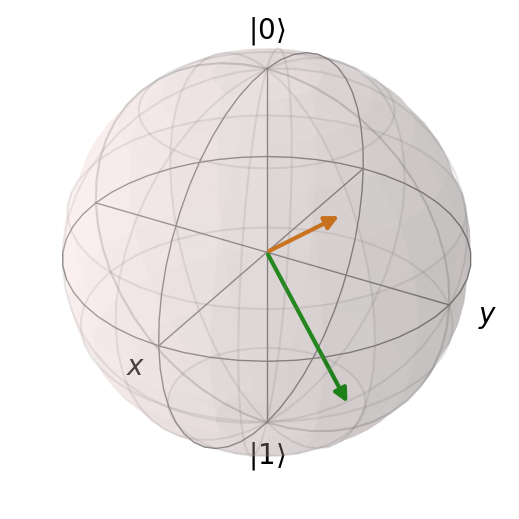

In [43]:
#get initial and final states
xeg = CZ_xeg.states[0].ptrace(0).extract_states([0,1])
xeg_f = CZ_xeg.states[-1].ptrace(0).extract_states([0,1])

#get sigma expect values 
z0 = (qt.sigmaz()*xeg).tr()
x0 = (qt.sigmax()*xeg).tr()
y0 = (qt.sigmax()*xeg).tr()

zf = (qt.sigmaz()*xeg_f).tr()
xf = (qt.sigmax()*xeg_f).tr()
yf = (qt.sigmax()*xeg_f).tr()

s0 = [x0, y0, z0]
sf = [xf, yf, xf]

b = qt.Bloch()
b.add_vectors(s0)
b.add_vectors(sf)
b.render()
b.show()

